In [1]:
from sklearn.datasets import make_multilabel_classification
# from bls2 import broadnet
import bls1,bls2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('yeast', 'train')
X_test, y_test, _, _ = load_dataset('yeast', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

yeast:train - exists, not redownloading
yeast:test - exists, not redownloading


In [4]:
num=10

In [5]:
bls = bls1.broadnet(maptimes = 30,
               enhencetimes = 30,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)
bls_2 = bls2.broadnet(maptimes = 30,
               enhencetimes = 30,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)

In [6]:
accuracy=[]
hamming=[]
f1=[]
accuracy_2=[]
hamming_2=[]
f1_2=[]
for i in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    X_train,X_alpha,y_train,y_alpha=train_test_split(X_train,y_train,test_size=0.1)
    bls.fit(X_train,y_train)
    bls.decoder_alpha(X_alpha,y_alpha)
    predition=bls.predict(X_test)
    accuracy.append(accuracy_score(y_pred=predition,y_true=y_test))
    hamming.append(hamming_loss(y_pred=predition,y_true=y_test))
    f1.append(f1_score(y_pred=predition,y_true=y_test,average='micro'))
    y_train[y_train==0]=-1
    bls_2.fit(X_train,y_train)
    bls_2.decoder_alpha(X_alpha,y_alpha)
    predition=bls_2.predict(X_test)
    accuracy_2.append(accuracy_score(y_pred=predition,y_true=y_test))
    hamming_2.append(hamming_loss(y_pred=predition,y_true=y_test))
    f1_2.append(f1_score(y_pred=predition,y_true=y_test,average='micro'))


number of mapping nodes 3000, number of enhence nodes 3000
mapping nodes maxvalue 29.31931 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
[0.527169505271695, 0.5285186704965121, 0.5312370707488622, 0.5328314512756169, 0.5322648671446647, 0.5348639455782312, 0.5368150684931506, 0.537532355478861, 0.5414123801220576, 0.5424922941435492, 0.5459411239964318, 0.5462713387241689, 0.5445499773857982, 0.5422181652213601, 0.5430280717901519, 0.5446096654275093, 0.5447726207219878, 0.5445965077866918, 0.5449358059914409, 0.5461501673840268, 0.5457170356111646, 0.5474806201550387, 0.5475024485798237, 0.5483234714003946, 0.5450921773791729, 0.5423387096774194, 0.5465648854961832, 0.5463917525773195, 0.5429017160686427, 0.5412506568575933, 0.5389920424403184, 0.5384615384615385, 0.5377155172413792, 0.5377512221618685, 0.5355371900826446, 0.535415504740658, 0.532809871003926, 0.5310734463276836, 0.5290763968072977, 0.52479815455594, 0.5229517722254503, 0.5187793427230047, 0.5150620200826934,

number of mapping nodes 3000, number of enhence nodes 3000
mapping nodes maxvalue 28.55036 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
[0.5166767738023045, 0.5149117468046257, 0.5134146341463414, 0.512883435582822, 0.5126621371216801, 0.5093167701863354, 0.5099750623441396, 0.5065666041275798, 0.5053560176433523, 0.504424778761062, 0.5047558655675334, 0.5038167938931297, 0.5025575447570333, 0.5009633911368014, 0.5016077170418007, 0.49740259740259746, 0.49673202614379086, 0.4944262295081967, 0.4940867279894876, 0.4917600527356625, 0.4907407407407407, 0.49136786188579024, 0.4899866488651535, 0.49162759544541196, 0.49259757738896365, 0.4939271255060728, 0.49355932203389835, 0.4925170068027211, 0.4876712328767124, 0.4838042729152308, 0.48438584316446914, 0.48366921473245306, 0.4811188811188811, 0.47859649122807013, 0.47605633802816905, 0.4763250883392226, 0.4726756564939674, 0.46832740213523133, 0.46823697359029265, 0.4663805436337626, 0.4633093525179856, 0.46286950252343184, 0.

number of mapping nodes 3000, number of enhence nodes 3000
mapping nodes maxvalue 27.82392 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
[0.5204799338022342, 0.5223568742164648, 0.5227655986509275, 0.5253731343283582, 0.5272649205667668, 0.5292334343871806, 0.5301310043668122, 0.5322793148880105, 0.5316792202038104, 0.5347066726377072, 0.5341783612494342, 0.536741214057508, 0.537037037037037, 0.5360824742268041, 0.5378071833648393, 0.5367258761401824, 0.5374577090381827, 0.5372262773722628, 0.5394801373222168, 0.5381565906838454, 0.5391912131802297, 0.5412474849094567, 0.5386178861788619, 0.5382639958911146, 0.5402597402597402, 0.5399477806788511, 0.5397159389794844, 0.536663124335813, 0.5356186395286555, 0.5356371490280778, 0.5329700272479565, 0.5333333333333333, 0.5336297943301834, 0.5310924369747899, 0.5282805429864253, 0.52715837621498, 0.5241935483870969, 0.5258270458502612, 0.5281030444964872, 0.5301775147928993, 0.5292014302741359, 0.5298732649366324, 0.5292682926829269

number of mapping nodes 3000, number of enhence nodes 3000
mapping nodes maxvalue 27.73702 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
[0.548148148148148, 0.5471464019851117, 0.5455680399500624, 0.543859649122807, 0.5443117536140791, 0.5436156763590392, 0.5433818872704241, 0.5423297262889879, 0.5400898011545864, 0.5383129426915647, 0.5389610389610391, 0.5383615084525359, 0.5339425587467364, 0.5350819672131147, 0.5303430079155673, 0.53085600530856, 0.5322687957418496, 0.5307486631016044, 0.5287817938420348, 0.528504359490275, 0.5295698924731183, 0.527027027027027, 0.5261016949152543, 0.5245231607629428, 0.5225718194254446, 0.5195876288659793, 0.5179558011049723, 0.5172890733056709, 0.5176960444136016, 0.5180555555555556, 0.5174337517433751, 0.516083916083916, 0.512280701754386, 0.5098591549295775, 0.5106082036775106, 0.5028490028490028, 0.5035663338088444, 0.503216583273767, 0.5014367816091954, 0.49963794351918905, 0.49781659388646293, 0.4941520467836257, 0.4908155767817782, 

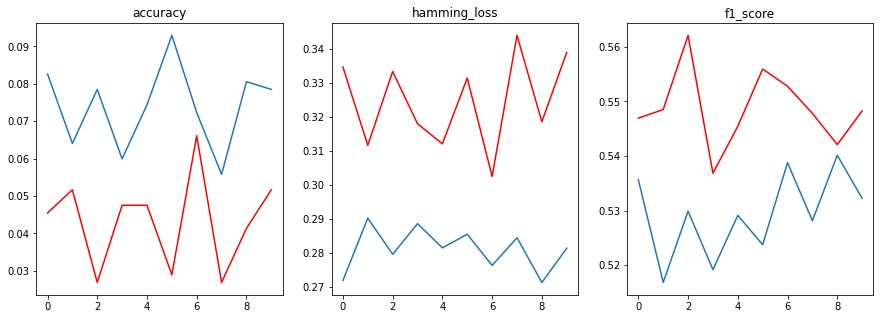

In [7]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title("accuracy")
plt.plot(accuracy,color='red')
plt.plot(accuracy_2)
plt.subplot(1,3,2)
plt.title("hamming_loss")
plt.plot(hamming,color='red')
plt.plot(hamming_2)
plt.subplot(1,3,3)
plt.title("f1_score")
plt.plot(f1,color='red')
plt.plot(f1_2)
plt.show()

In [8]:
y_train[y_train==0]=-1

In [9]:
bls_2 = bls2.broadnet(maptimes = 30,
               enhencetimes = 30,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)

In [10]:
bls_2.fit(X_train,y_train)
predition=bls_2.predict(X_test)
print(accuracy_score(y_pred=predition,y_true=y_test))
print(hamming_loss(y_pred=predition,y_true=y_test))
print(f1_score(y_pred=predition,y_true=y_test,average='micro'))

number of mapping nodes 3000, number of enhence nodes 3000
mapping nodes maxvalue 27.51302 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
0.08471074380165289
0.2832054309327037
0.5500586166471277


In [11]:
X.shape
X_train.shape

(1739, 103)